In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.porter import PorterStemmer

reading train data

In [2]:
trainData = pd.read_csv('../data/raw/train.csv')
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [3]:
trainData.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


reading test data

In [4]:
testData = pd.read_csv('../data/raw/test.csv')
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375806 entries, 0 to 375805
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   qid            375806 non-null  object
 1   question_text  375806 non-null  object
dtypes: object(2)
memory usage: 5.7+ MB


In [5]:
testData.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [6]:
def generatePieChart(data, colName):
    percentage = data[colName].value_counts(normalize=True)
    values = [colName+' '+str(i) for i in percentage.index]
    plt.pie(percentage, labels=values, autopct='%1.1f%%', shadow=True)
    plt.show()
    return

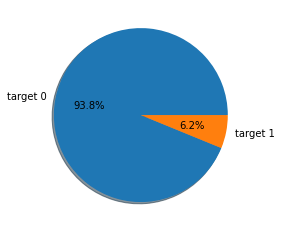

In [7]:
generatePieChart(trainData, 'target')

In [8]:
def generateBarPlot(data, colName):
    count = data[colName].value_counts()
    values = [str(i) for i in count.index]
    plt.bar(values, count)
    plt.ticklabel_format(style='plain', axis='y')
    plt.ylabel(colName+' count')
    plt.xlabel(colName);
    plt.grid(axis='y', linestyle='--')
    plt.show()
    return

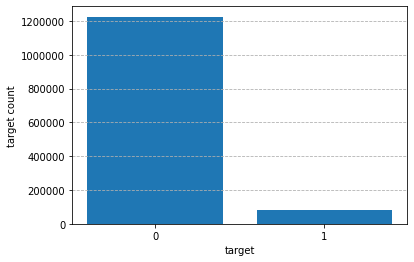

In [9]:
generateBarPlot(trainData, 'target')

In [10]:
#dfTrain = trainData.copy()
#dfTest = testData.copy()

In [11]:
def removeExtraChars(qtext):
    # Keep letters, apostrophe and white space
    result = [re.sub(r'[^A-Za-z ]+', ' ', sentence) for sentence in qtext]
    return result

In [12]:
def removeStopWords(qtext):
    # Remove stop words
    result = []
    for sentence in qtext:
        words = sentence.split()
        result.append(' '.join([w for w in words if w not in STOPWORDS]))
    return result

In [13]:
def preprocessText(qtext):
    
    # Remove extra characters
    qtext1 = removeExtraChars(qtext)
    
    # Lower case
    qtext2 = [sentence.lower() for sentence in qtext1]
    
    # Remove stop words
    result = removeStopWords(qtext2)
    
    return result

In [14]:
def tokenize(sentence):
    tokens = [word for word in nltk.word_tokenize(sentence) if len(word)>1]
    stemmer = PorterStemmer()
    stems = [stemmer.stem(item) for item in tokens]
    return stems

In [26]:
def createDTM(qtext):
    vectorizer = TfidfVectorizer(tokenizer = tokenize)#, ngram_range = ((2,2)))#, use_idf=False, norm='l1')
    tdm = vectorizer.fit_transform(qtext)
    #results = pd.DataFrame(tdm.toarray(), columns=vectorizer.get_feature_names())
    return vectorizer, tdm

In [27]:
#sss = preprocessText(trainData[trainData['target']==1]['question_text'].to_list())
sss = preprocessText(["The quick brown fox jumped over the lazy dog.","The dog.","The fox"])
vectorizer, tdm = createDTM(sss) 

result = pd.DataFrame(tdm.toarray(), columns=vectorizer.get_feature_names())
print(result)

      brown       dog       fox      jump      lazi     quick
0  0.440362  0.334907  0.334907  0.440362  0.440362  0.440362
1  0.000000  1.000000  0.000000  0.000000  0.000000  0.000000
2  0.000000  0.000000  1.000000  0.000000  0.000000  0.000000


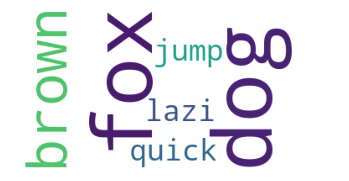

In [28]:
d = {}
keys = vectorizer.get_feature_names()
for k in keys:
    d[k] = sum(result[k])
w = WordCloud(mode='RGBA',background_color='white',
              max_words=100).generate_from_frequencies(d)
plt.imshow(w)
plt.axis('off')
plt.show()

In [18]:
def generateWordCloud(data):
    
    # Combine
    text = " ".join(data.tolist())
    
    # Generate word cloud
    wordcloud = WordCloud(background_color='white').generate(words)

    # Plot the result
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
    return

In [19]:
#generateWordCloud(dfTrain[dfTrain['target']==0].question_text)

In [20]:
#generateWordCloud(dfTrain[dfTrain['target']==1].question_text)